In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import folium

In [32]:
dfNCA = pd.read_excel ("2018 Total Nationality.xlsx")

In [33]:
dfNCA

,Claimed Nationality,Domestic Servitude,Labour Exploitation,Organ Harvesting,Sexual Exploitation,Unknown Exploitation,Total 2018,Total 2017
0,United Kingdom,10,1134,0,448,33,1625,819.0
1,Albania,20,359,2,512,54,947,777.0
2,Vietnam,22,484,1,92,103,702,737.0
3,China,14,220,0,191,26,451,293.0
4,Romania,4,314,0,79,30,427,259.0
5,Sudan,11,331,0,1,19,362,237.0
6,Eritrea,34,178,0,37,53,302,189.0
7,Nigeria,47,38,0,103,20,208,264.0
8,India,31,141,0,18,6,196,140.0
9,Pakistan,47,63,0,16,8,134,97.0


In [34]:
dfTotal = dfNCA[['Claimed Nationality','Total 2018']]

In [35]:
dfTotal

,Claimed Nationality,Total 2018
0,United Kingdom,1625
1,Albania,947
2,Vietnam,702
3,China,451
4,Romania,427
5,Sudan,362
6,Eritrea,302
7,Nigeria,208
8,India,196
9,Pakistan,134


In [36]:
dfTotal1=dfTotal.drop(dfTotal.index[132])

In [37]:
dfTotal1.head()

,Claimed Nationality,Total 2018
0,United Kingdom,1625
1,Albania,947
2,Vietnam,702
3,China,451
4,Romania,427


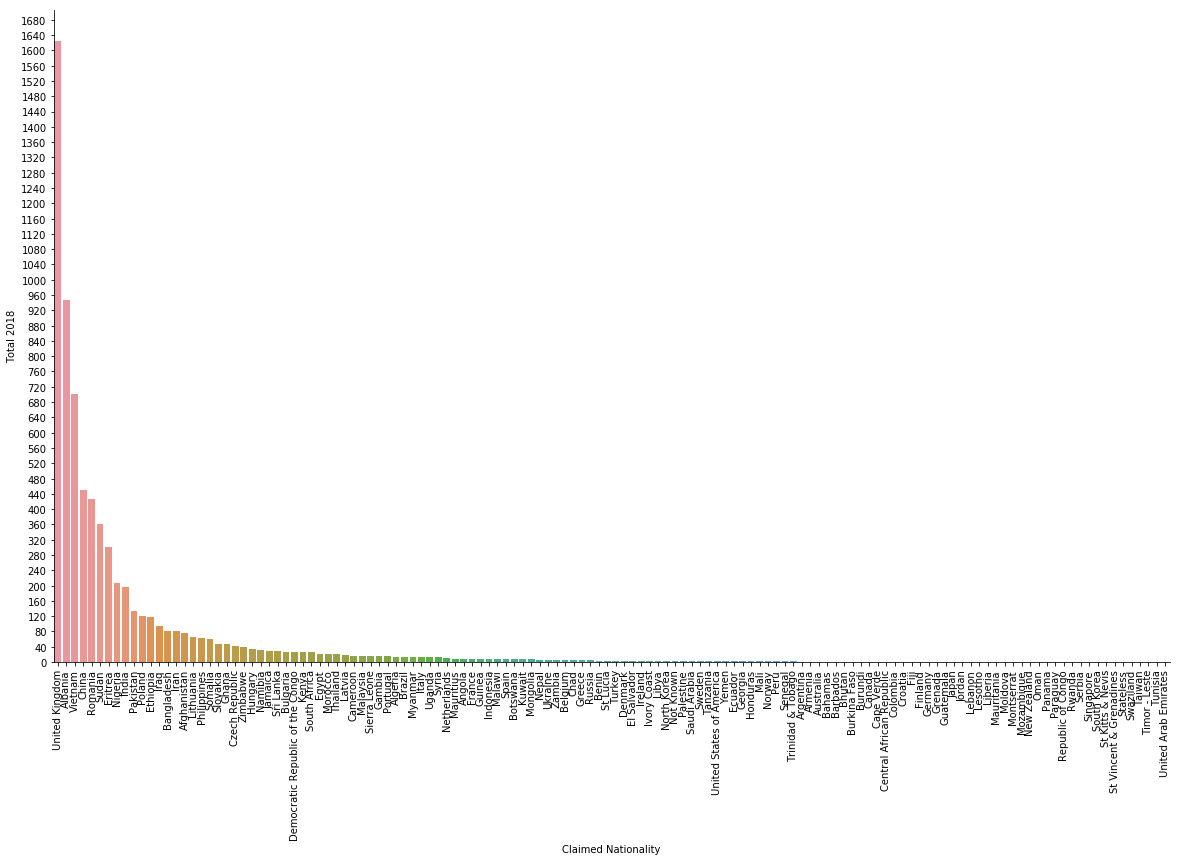

In [38]:
dsbarchart = plt.figure(figsize=(20, 12))  # width:20, height:3
sns.barplot(x='Claimed Nationality', y='Total 2018', data=dfTotal1,)
sns.despine()
plt. xticks(rotation=90)

import matplotlib.ticker as ticker


ax_data = sns.barplot(x= 'Claimed Nationality', y = 'Total 2018', data=dfTotal1) # change as per how you are plotting, just for an example
ax_data.yaxis.set_major_locator(ticker.MultipleLocator(40)) # it would have a tick frequency of 40, change 40 to the tick-frequency you want.
ax_data.yaxis.set_major_formatter(ticker.ScalarFormatter())

In [39]:
countries_json = 'world-countries.json'

In [40]:
m = folium.Map(location=[10, 1], zoom_start=2)

folium.Choropleth(
    geo_data=countries_json,
    name='choropleth',
    data=dfTotal1,
    columns=['Claimed Nationality', 'Total 2018'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    threshold_scale=[0, 10, 200, 600, 1626],
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color = 'white',
    legend_name='Number of NRM Referrals'
).add_to(m)

folium.LayerControl().add_to(m)


In [41]:
m

In [42]:
m1 = folium.Map(location=[10, 1], zoom_start=2, tiles='Mapbox Bright')
m1.choropleth(
    geo_data=countries_json, #this is reading the geographical data from the json file
    data=dfTotal1, #this is reading my df
    columns=['Claimed Nationality', 'Total 2018'], #which columns do I want it to read
    key_on='feature.properties.name',
   threshold_scale=[0, 80, 200, 600, 1626],
    fill_color='YlGn',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color = 'white',
    legend_name='Number of NRM Referrals Received',
    highlight=True
)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [43]:
m1

In [44]:
m1.save('worldmap.html')

